### Initial Loader Test

In [ ]:
from loader.VideoDataset import *
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
path='/home/nfs/inf6/data/datasets/MOVi/movi_c/'
#vl=VideoDataset(path,split='train') # uncomment to load training set
video_dataset=VideoDataset(path,split='validation') # to load validation set
video_loader = DataLoader(dataset=video_dataset, 
                               batch_size=60,
                               shuffle=False)

BATCH Video number: 1, read frames count: 24


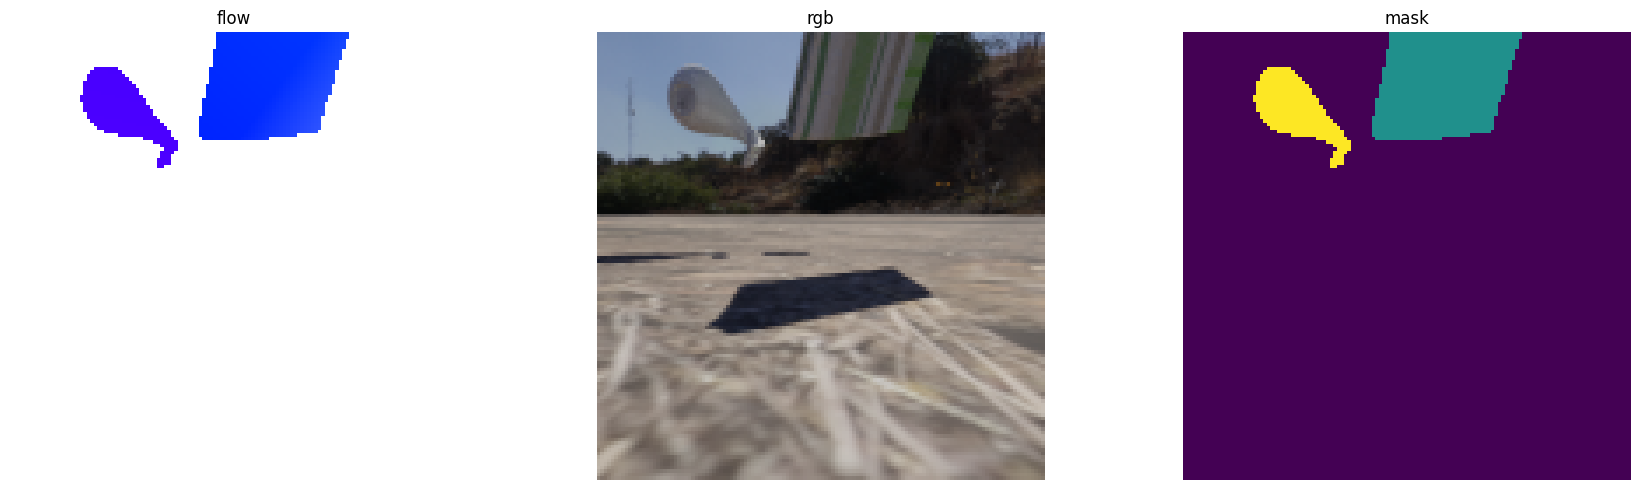

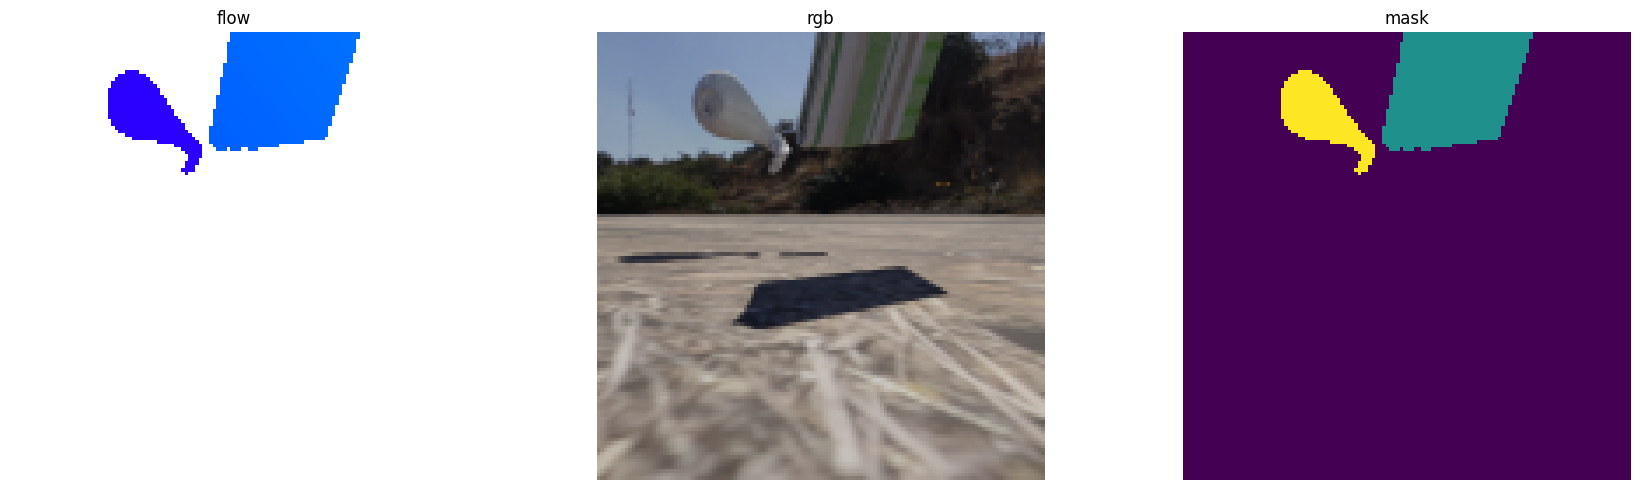

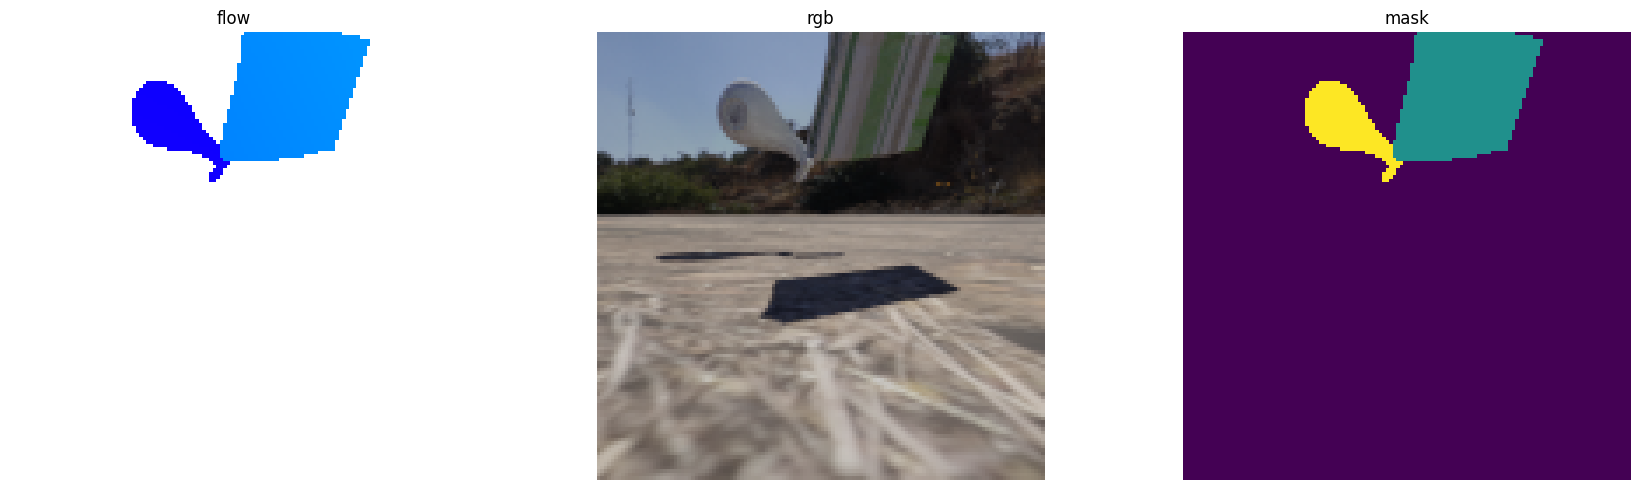

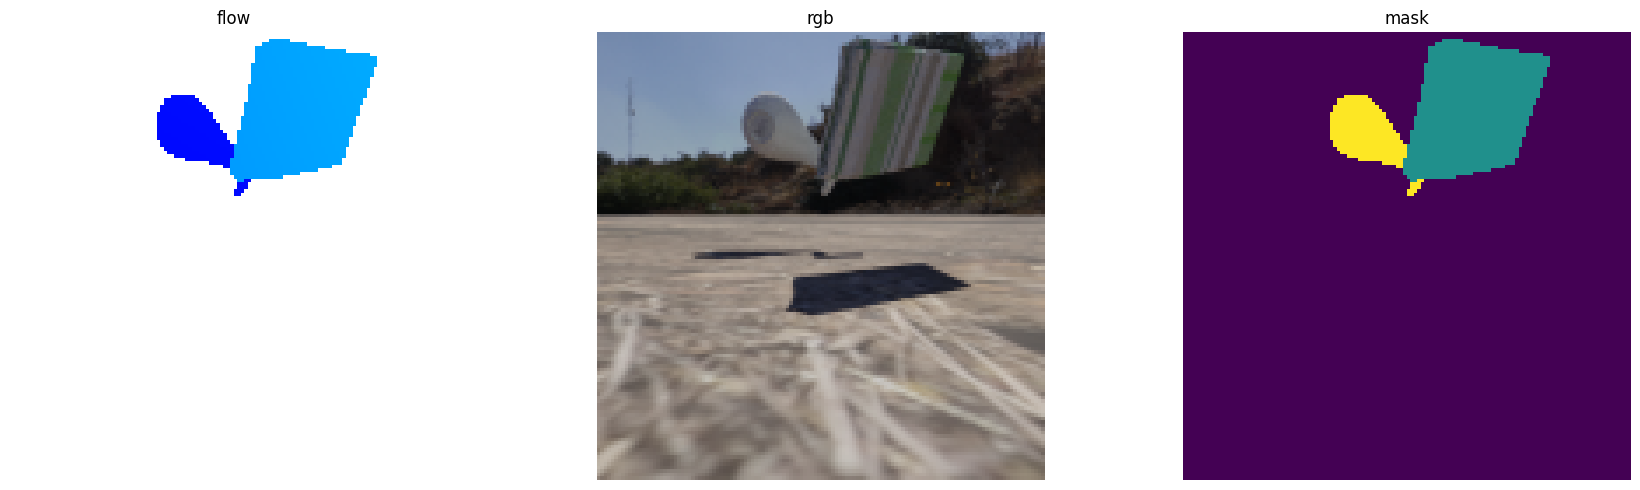

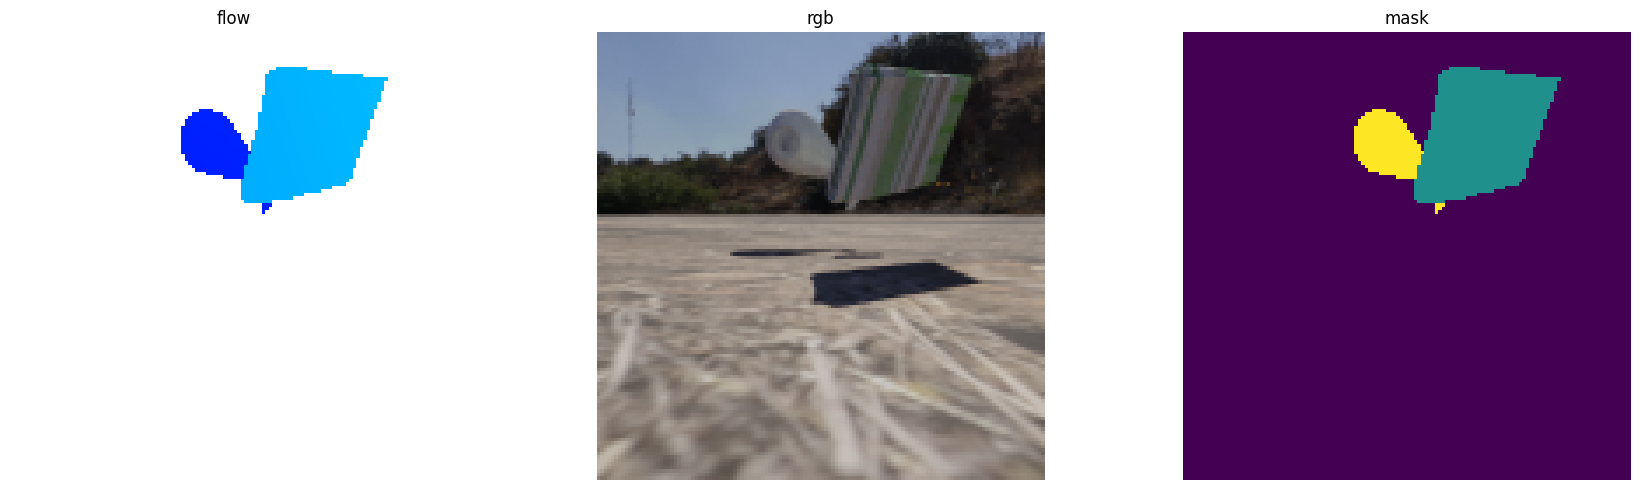

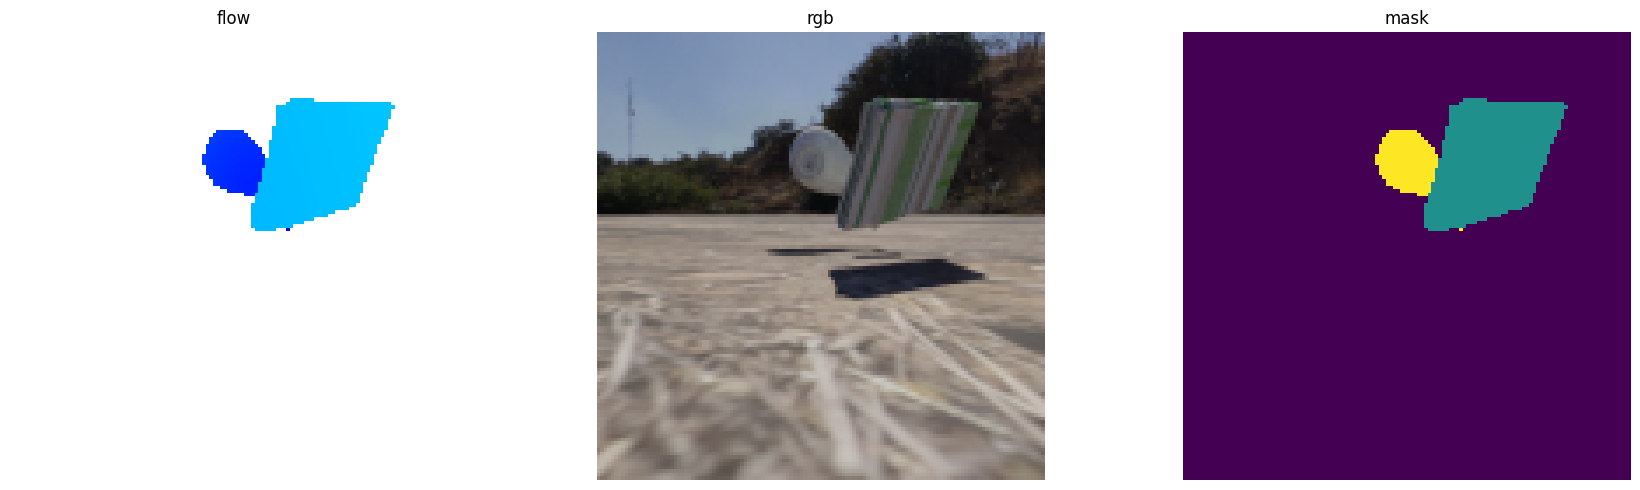

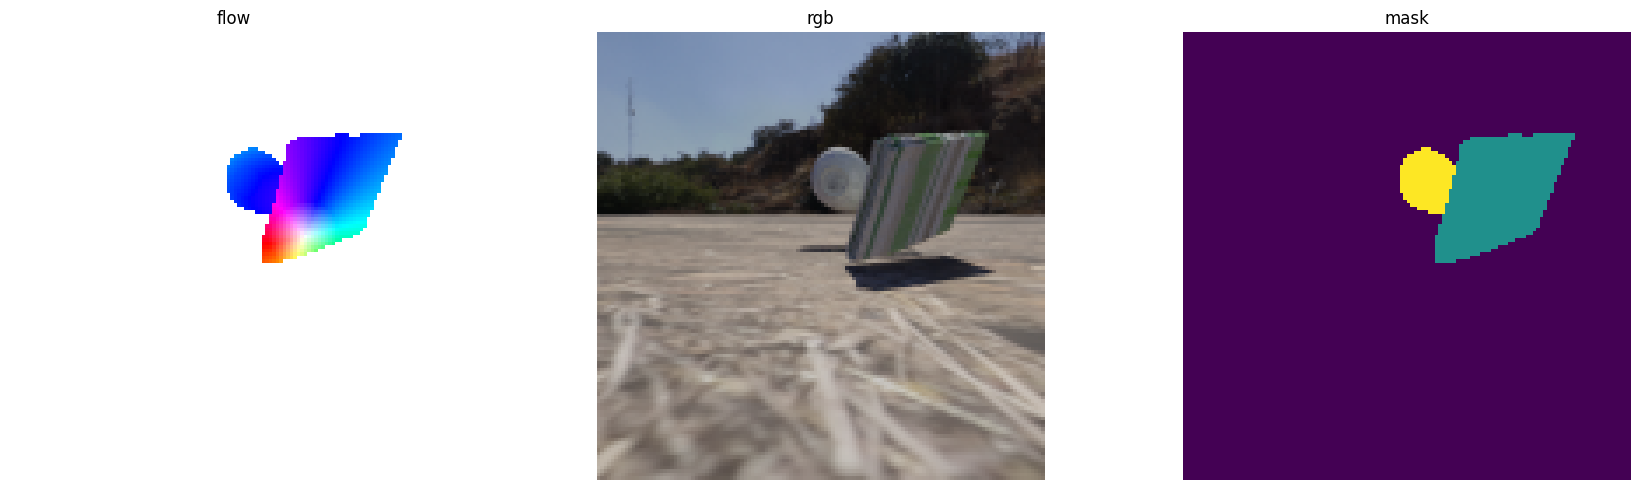

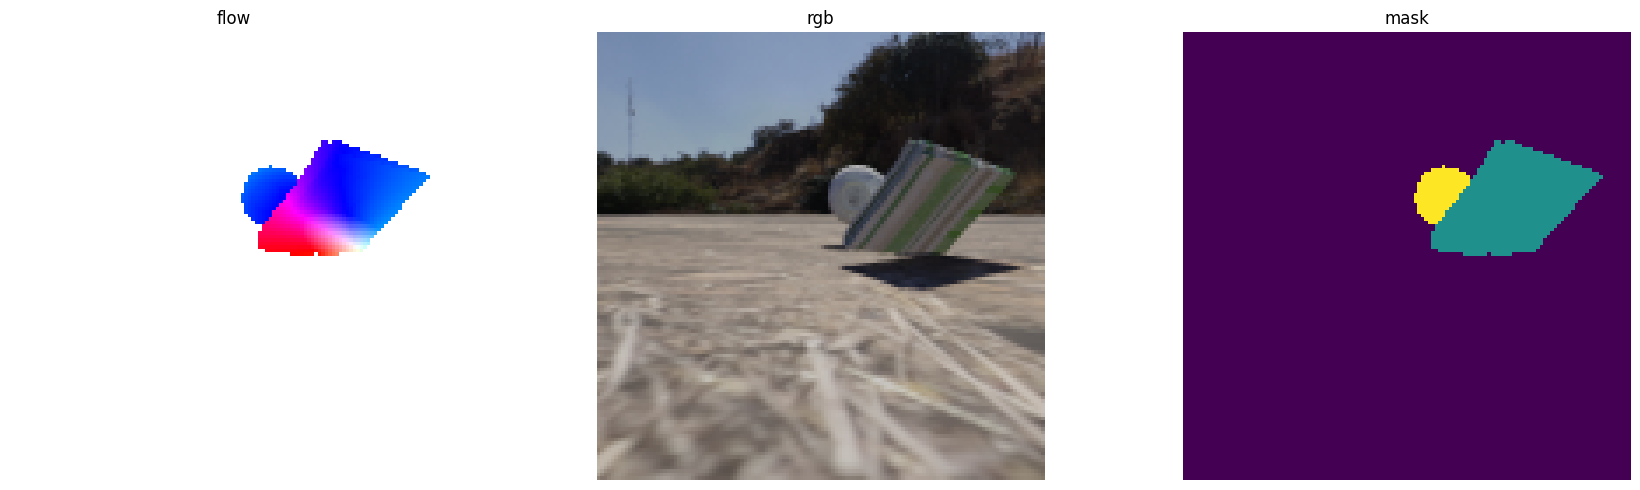

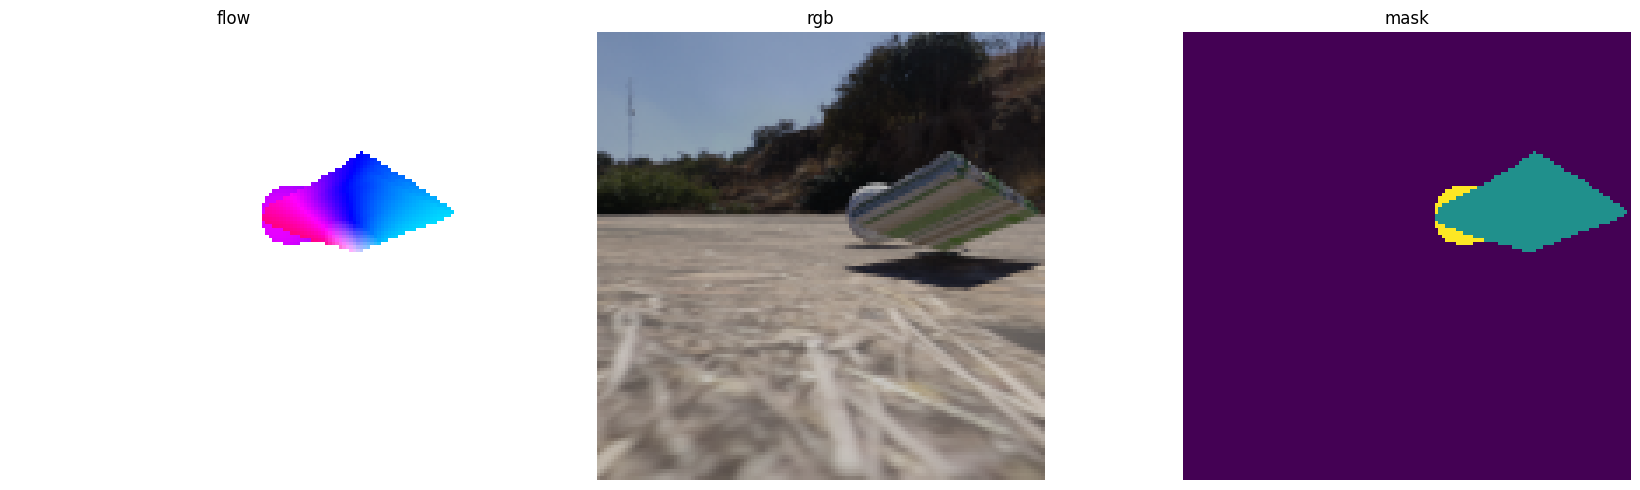

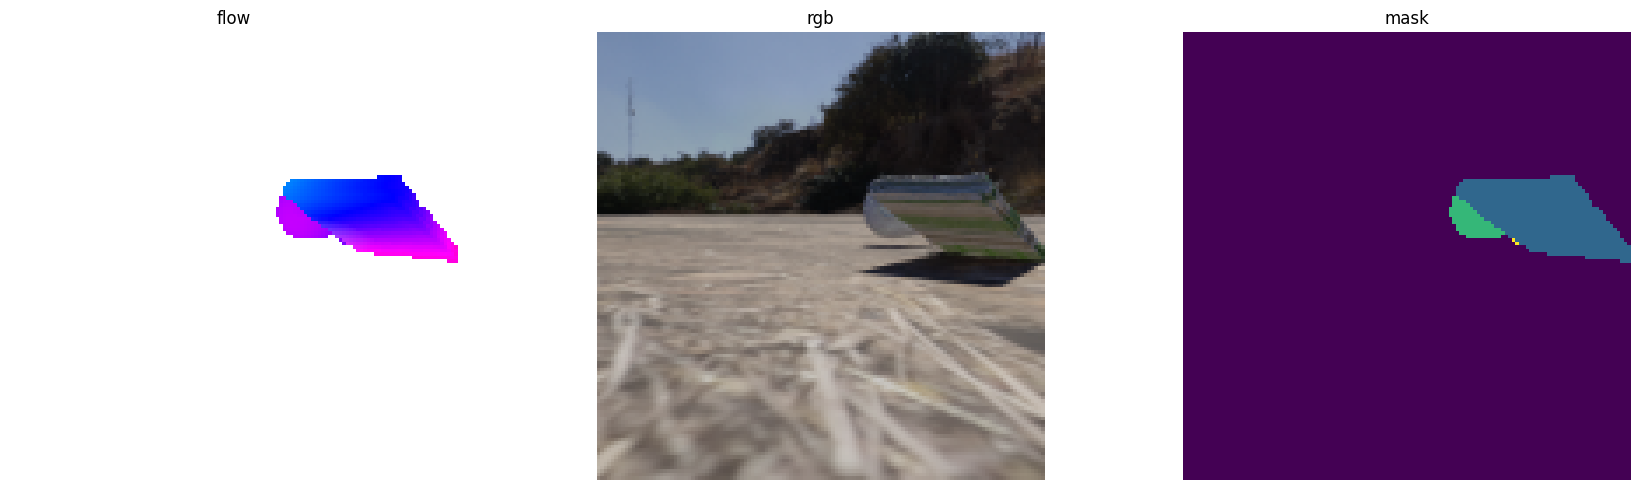

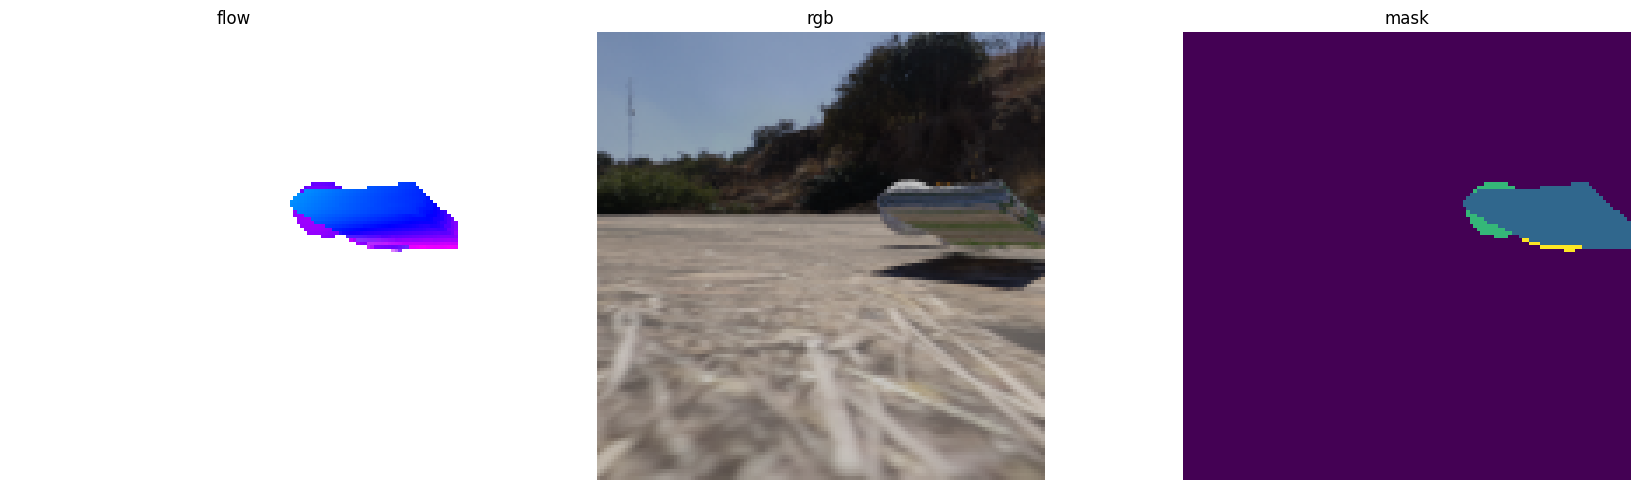

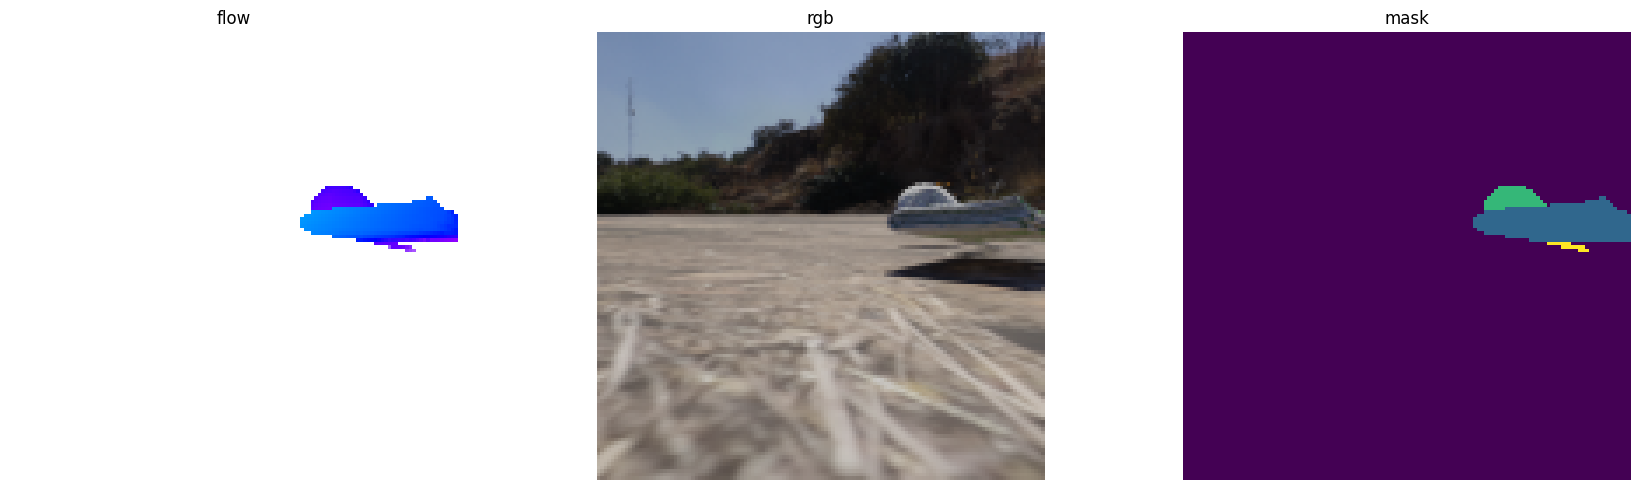

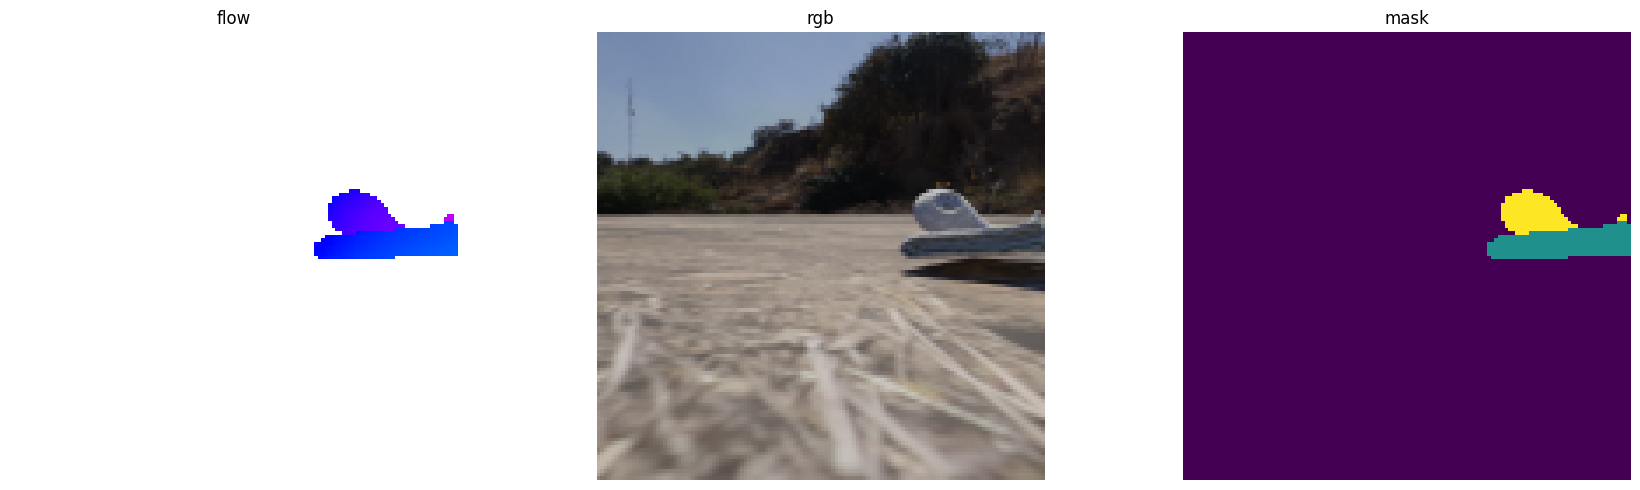

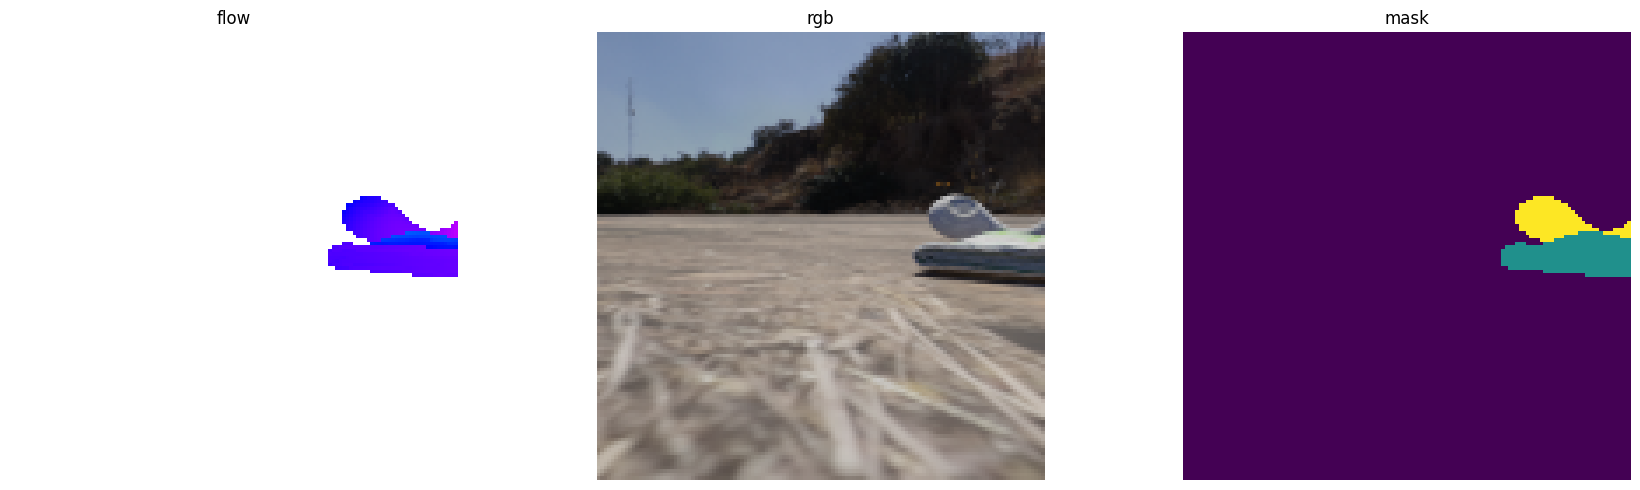

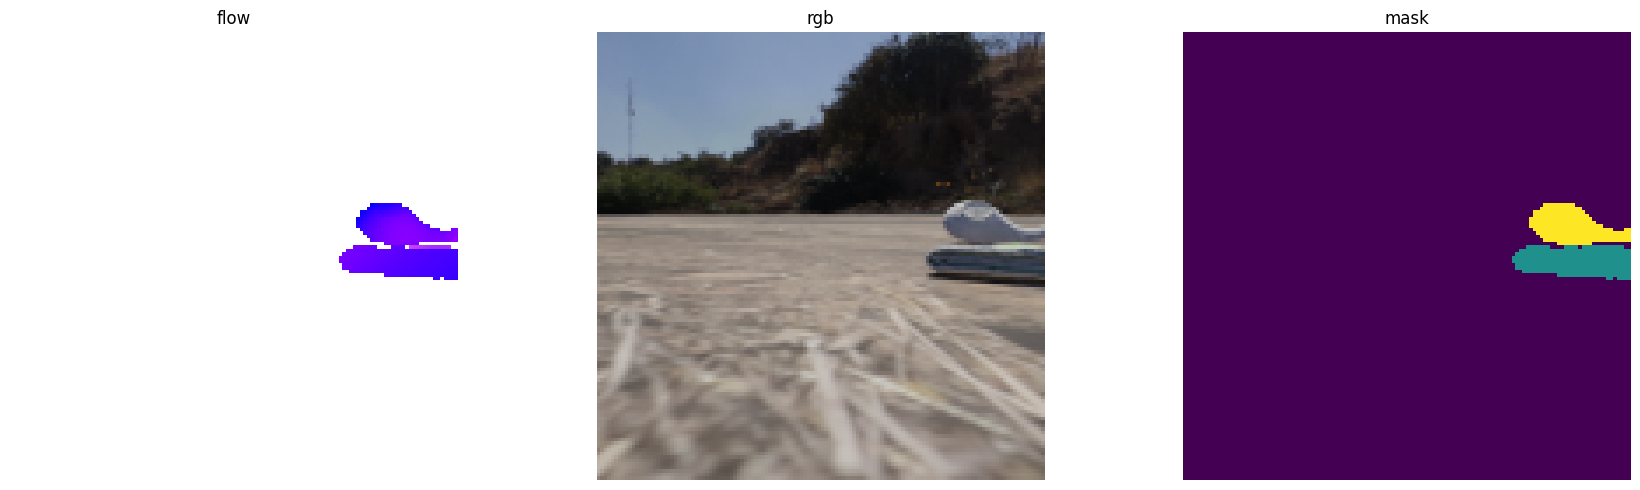

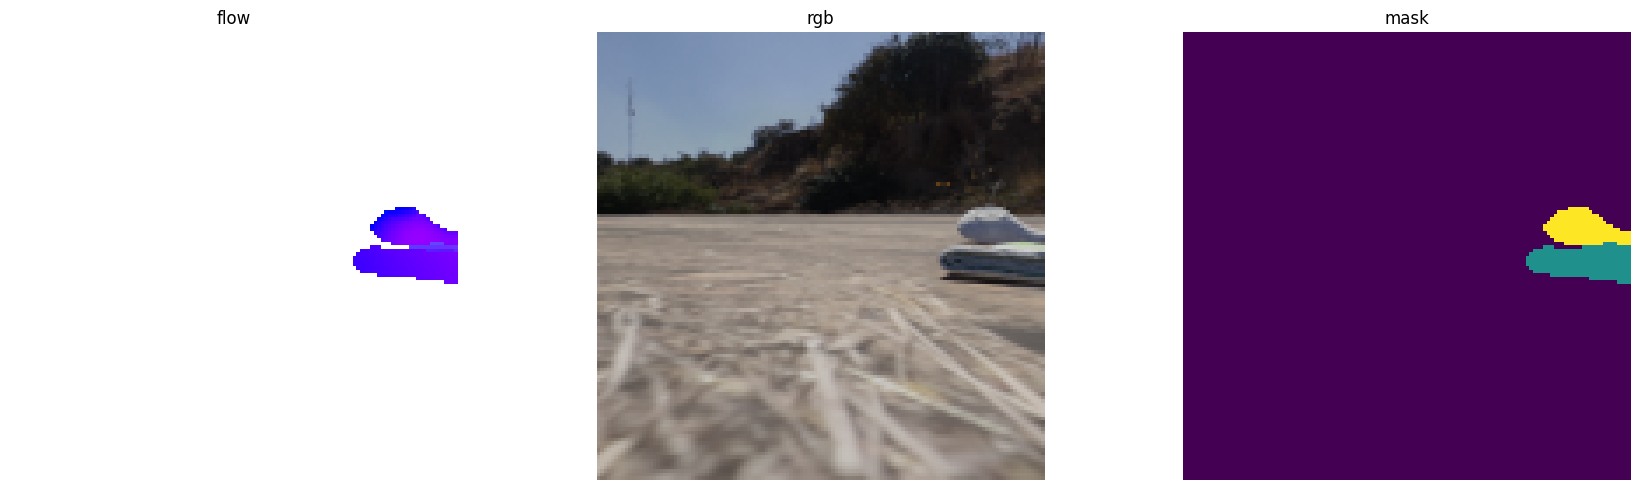

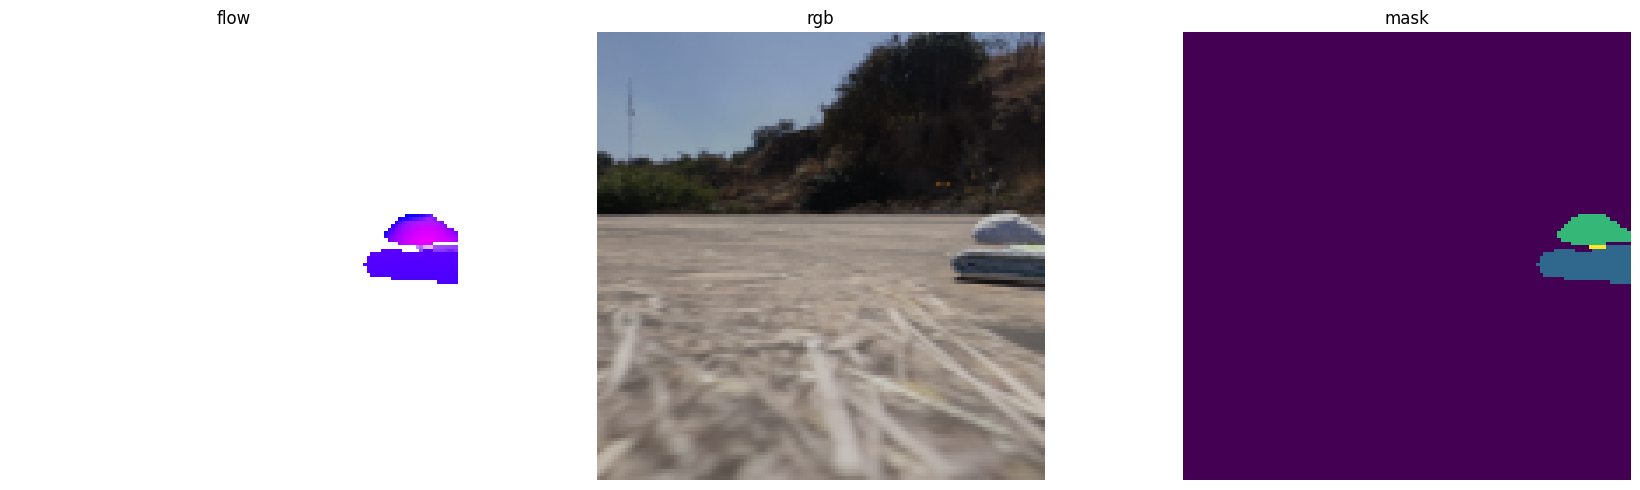

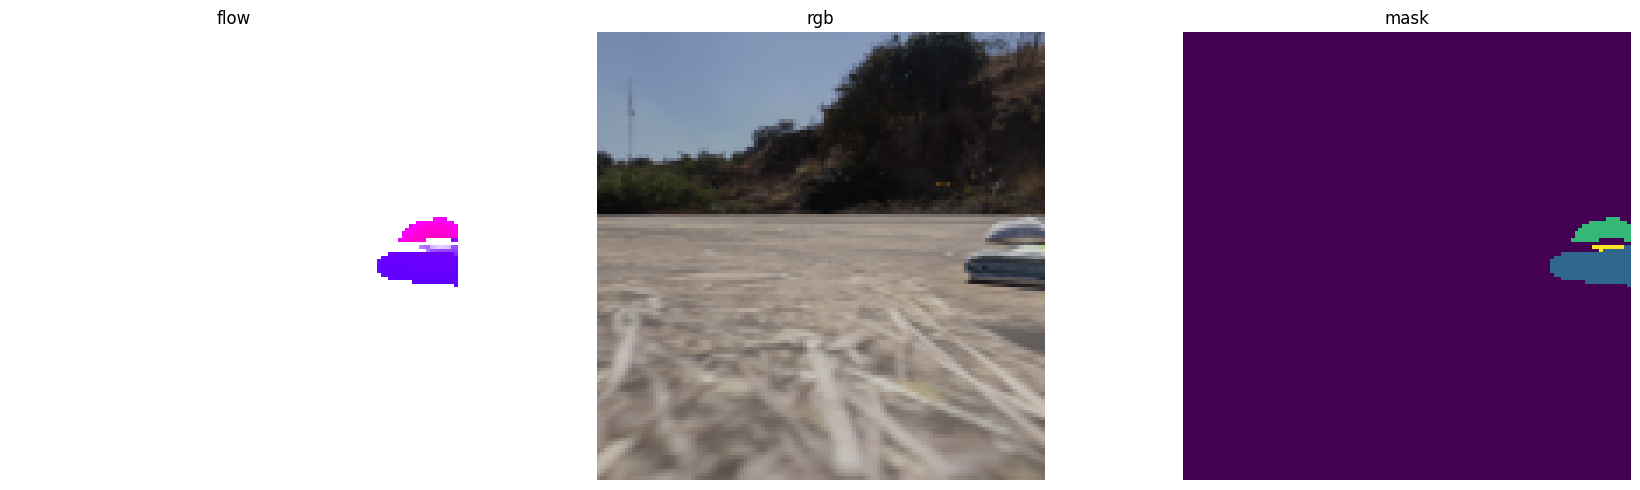

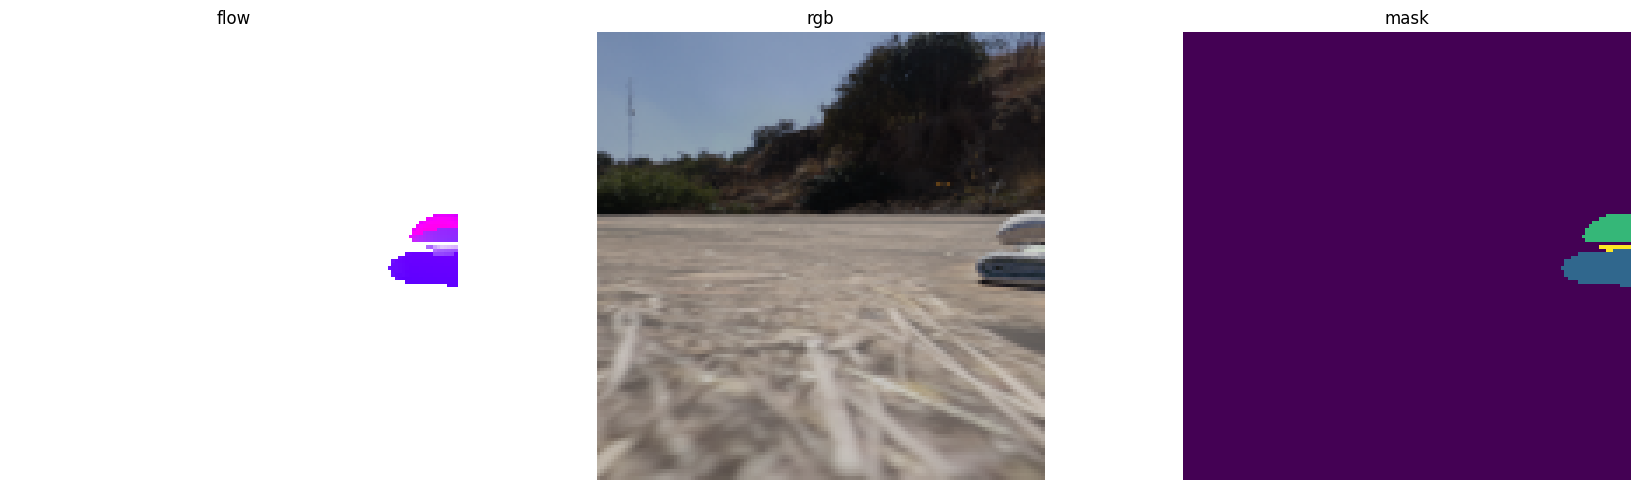

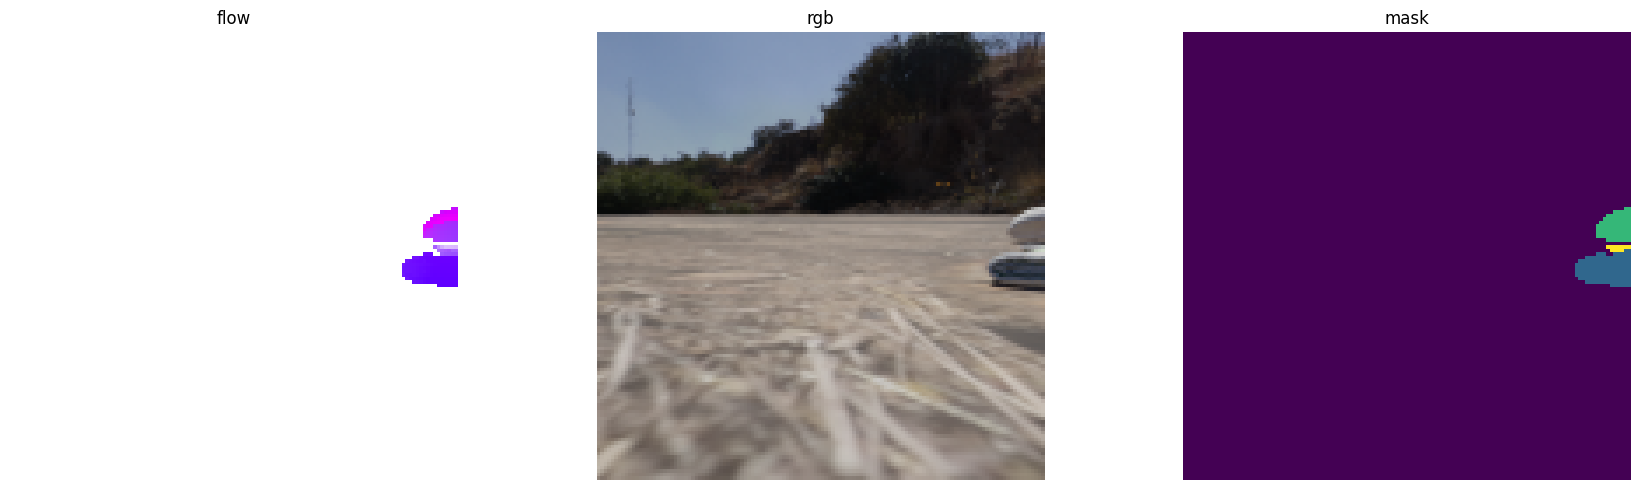

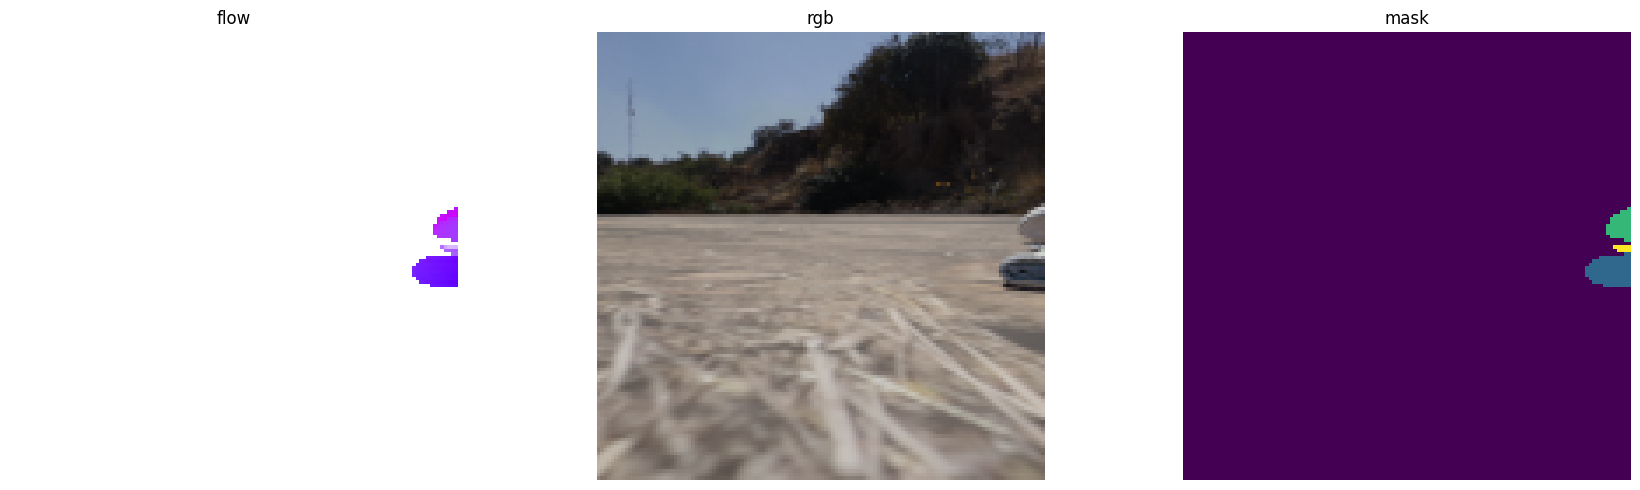

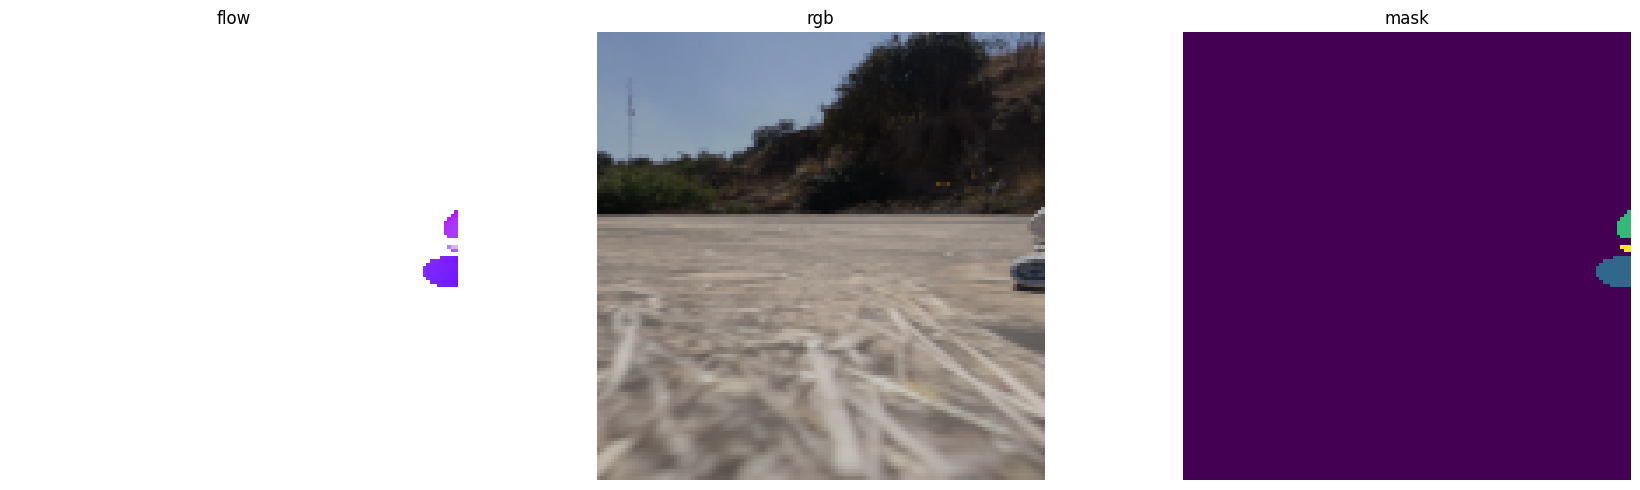

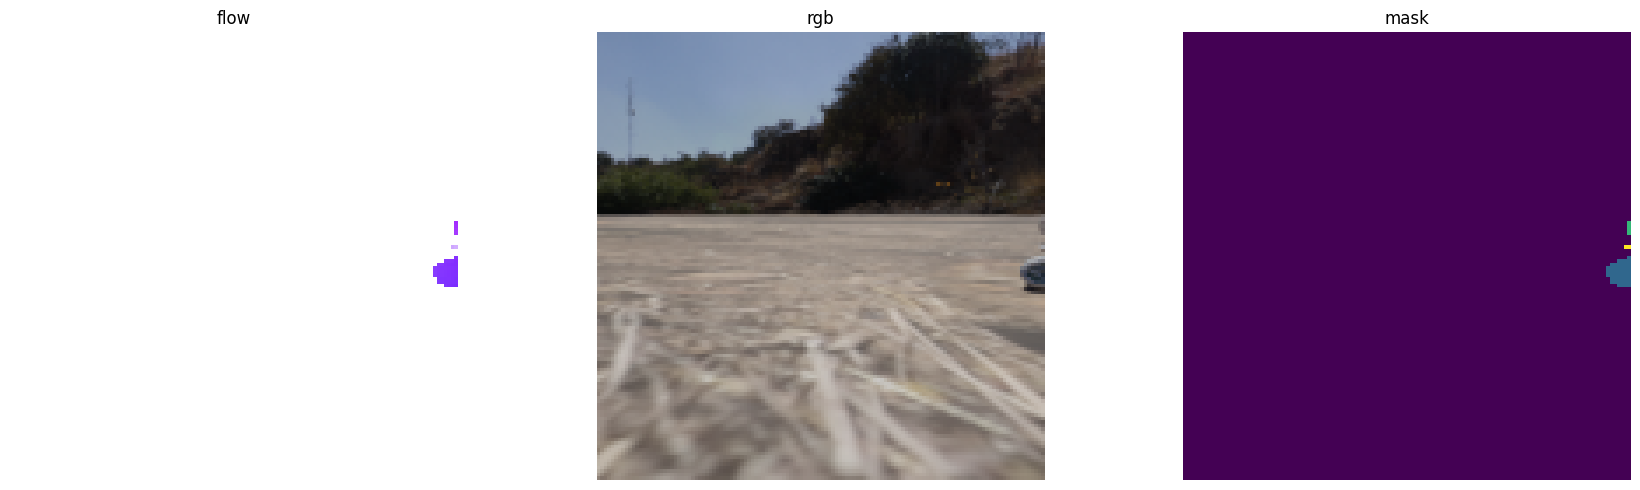

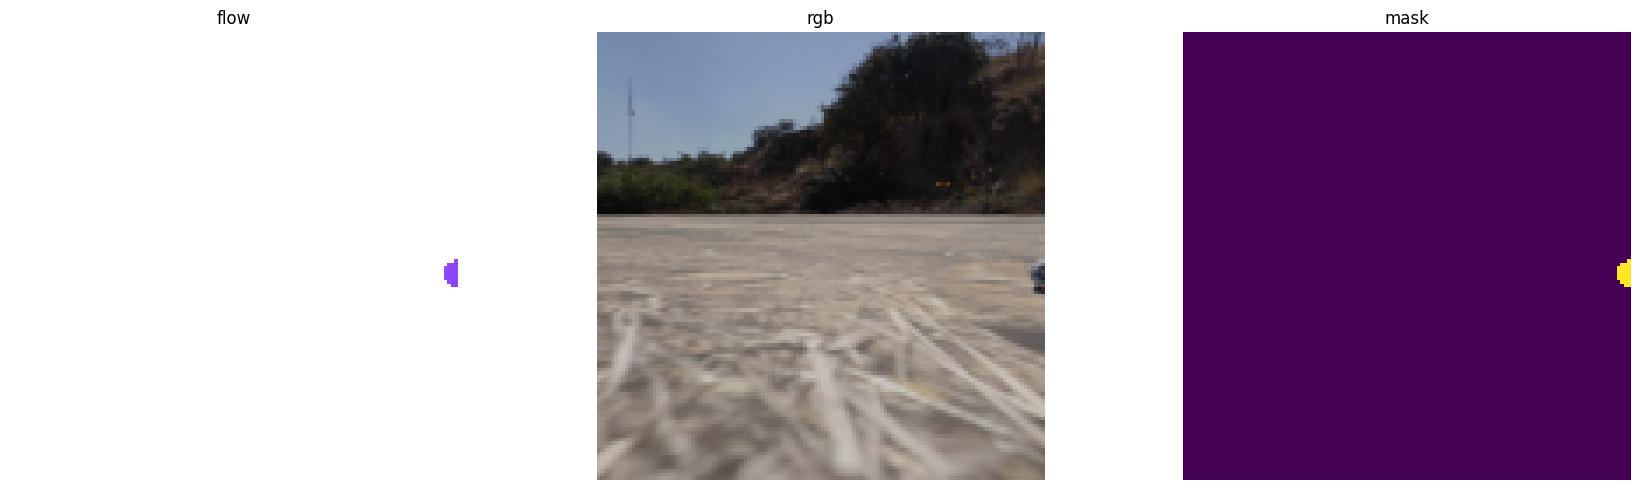

BATCH Video number: 2, read frames count: 24
BATCH Video number: 3, read frames count: 24
BATCH Video number: 4, read frames count: 24
BATCH Video number: 5, read frames count: 24
BATCH Video number: 6, read frames count: 24
BATCH Video number: 7, read frames count: 24
BATCH Video number: 8, read frames count: 24
BATCH Video number: 9, read frames count: 24
BATCH Video number: 10, read frames count: 24
BATCH Video number: 11, read frames count: 24
BATCH Video number: 12, read frames count: 24
BATCH Video number: 13, read frames count: 24
BATCH Video number: 14, read frames count: 24
BATCH Video number: 15, read frames count: 24
BATCH Video number: 16, read frames count: 24
BATCH Video number: 17, read frames count: 24
BATCH Video number: 18, read frames count: 24
BATCH Video number: 19, read frames count: 24
BATCH Video number: 20, read frames count: 24
BATCH Video number: 21, read frames count: 24
BATCH Video number: 22, read frames count: 24
BATCH Video number: 23, read frames count:

In [ ]:
fistVideo=True
for (coords,masks,rgbs,flows) in video_loader:
    for i in range (coords['com'].shape[0]):   # iterate over batch size, i is video index in the batch.    
        video_frames_data=video_dataset.video_to_frames(coords['com'][i],coords['bbox'][i], masks['masks'][i], rgbs[i], flows[i])
        print(f"BATCH Video number: {i+1}, read frames count: {len(video_frames_data)}")
        if not fistVideo:
            continue
        for frame_index in range(len(video_frames_data)):
            coord,bbox,mask,rgb,flow=video_frames_data[frame_index]
            fig, ax = plt.subplots(1, 3)
            fig.set_size_inches(18, 5)
            ax[0].imshow((flow).clamp(0, 255).permute(1,2,0).byte().numpy())
            ax[0].axis("off")
            ax[0].set_title("flow")
            
            ax[1].imshow((rgb).clamp(0, 255).permute(1,2,0).byte().numpy())
            ax[1].axis("off")
            ax[1].set_title("rgb")
                        
            ax[2].imshow((mask).clamp(0, 255).byte().numpy())
            ax[2].axis("off")
            ax[2].set_title("mask")

            # Please keep in mind that the coord and bbox of each frame is also available here. 

            plt.tight_layout()
            plt.show()
        fistVideo=False